In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader


from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import mnist

11501568/11490434 [==============================] - 0s 0us/step


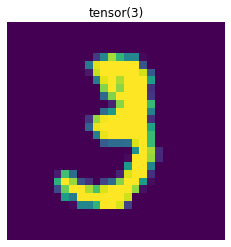

In [2]:

(features_train, targets_train), (features_test, targets_test) = mnist.load_data()


features_train, features_test = np.array(features_train, np.float32), np.array(features_test, np.float32)

num_features=784

features_train, features_test = features_train.reshape([-1, num_features]), features_test.reshape([-1, num_features])


features_train, features_test = features_train / 255., features_test / 255

featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor)

featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

batch_size = 100
n_iters = 5000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

plt.imshow(featuresTrain[10].reshape(28,28))
plt.axis("off")
plt.title(str(targetsTrain[10]))
plt.savefig('graph.png')
plt.show()

In [3]:
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        return (out)

input_dim = 28*28
hidden_dim = 120 
output_dim = 10

model = ANNModel(input_dim, hidden_dim, output_dim)

error = nn.CrossEntropyLoss()

learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [4]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
    
        optimizer.zero_grad()
    
        outputs = model(train)
    
        loss = error(outputs, labels)
    
        loss.backward()
    
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))

                outputs = model(test)

                predicted = torch.max(outputs.data, 1)[1]

                total += len(labels)

                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

        if count % 500 == 0:
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.6577998399734497  Accuracy: 54.369998931884766 %
Iteration: 1000  Loss: 0.5755836963653564  Accuracy: 85.19000244140625 %
Iteration: 1500  Loss: 0.6254768371582031  Accuracy: 88.31999969482422 %
Iteration: 2000  Loss: 0.33982279896736145  Accuracy: 89.0999984741211 %
Iteration: 2500  Loss: 0.21304911375045776  Accuracy: 91.08000183105469 %
Iteration: 3000  Loss: 0.353837251663208  Accuracy: 91.86000061035156 %
Iteration: 3500  Loss: 0.19571779668331146  Accuracy: 92.5 %
Iteration: 4000  Loss: 0.2687770128250122  Accuracy: 93.66000366210938 %
Iteration: 4500  Loss: 0.3832259476184845  Accuracy: 93.81999969482422 %


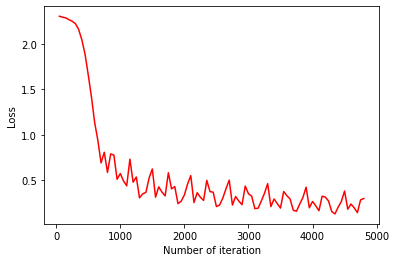

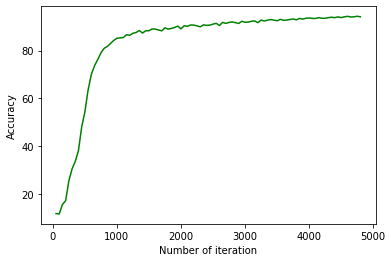

In [5]:
plt.plot(iteration_list,loss_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.show()

plt.plot(iteration_list,accuracy_list,color = "green")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.show()

In [6]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
      
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(32 * 4 * 4, 10)


    def forward(self, x):
        out = self.cnn1(x)

        out = self.relu1(out)

        out = self.maxpool1(out)
       
        out = self.cnn2(out)

        out = self.relu2(out)

        out = self.maxpool2(out)

        out = out.view(out.size(0), -1)
        
        out = self.fc1(out)
        
        return out


batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)
    
model = CNNModel()

error = nn.CrossEntropyLoss()

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [7]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)
               
        optimizer.zero_grad()
               
        outputs = model(train)
               
        loss = error(outputs, labels)
               
        loss.backward()     
               
        optimizer.step()    
        
        count += 1
        
        if count % 50 == 0:           
            correct = 0
            total = 0           
            for images, labels in test_loader:
                
                test = Variable(images.view(100,1,28,28))
                               
                outputs = model(test)
                               
                predicted = torch.max(outputs.data, 1)[1]
                               
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
                       
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:           
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Iteration: 500  Loss: 0.1859584003686905  Accuracy: 96.29000091552734 %
Iteration: 1000  Loss: 0.04134504869580269  Accuracy: 97.91999816894531 %
Iteration: 1500  Loss: 0.03665541112422943  Accuracy: 98.43000030517578 %
Iteration: 2000  Loss: 0.026172222569584846  Accuracy: 98.5999984741211 %


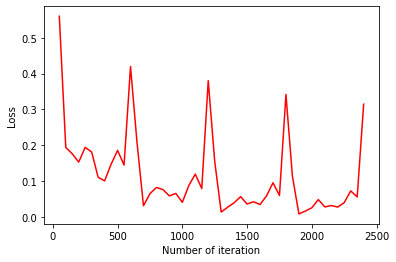

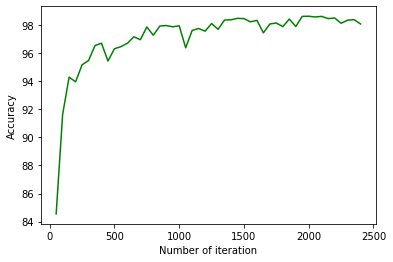

In [8]:
plt.plot(iteration_list,loss_list,color="red")
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.show()

plt.plot(iteration_list,accuracy_list,color = "green")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.show()